In [120]:
%matplotlib inline

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from SubCMedians.data_generator import make_subspace_blobs
from SubCMedians.subcmedians import subcmedians
from SubCMedians.subcmedians_v1 import subcmedians_v1
from SubCMedians.subcmedians_v2 import subcmedians_v2
from SubCMedians.subcmedians_v3 import subcmedians_v3
import SubCMedians.evaluation
np.random.seed(0)

# Create dataset

In [122]:
D = 50
dataset_params={"p_dim": 0.7,
                "n_samples":10000,
                "n_features":D,
                "centers":15}

X,y_true,ss = make_subspace_blobs(**dataset_params)
X = (X - X.mean(axis=0))/ X.std(axis=0)

In [123]:
Gmax = 500
H = 200
nb_iter = 20000

# Train Models

In [124]:
scm = subcmedians(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scm.fit(X)

In [125]:
scmv1 = subcmedians_v1(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv1.fit(X)

In [126]:
scmv2 = subcmedians_v2(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv2.fit(X)

In [127]:
scmv3 = subcmedians_v3(D, Gmax=Gmax, H=H, nb_iter=nb_iter)
scmv3.fit(X)

# Predict Clusters

In [128]:
y_pred_scm = scm.predict(X)

In [129]:
y_pred_scmv1 = scmv1.predict(X)

In [130]:
y_pred_scmv2 = scmv2.predict(X)

In [131]:
y_pred_scmv3 = scmv3.predict(X)

# Compare

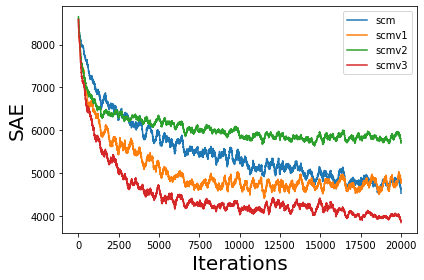

In [132]:
evaluation.plot_evolution({"scm":scm._sae_history, "scmv1":scmv1._sae_history, "scmv2":scmv2._sae_history, "scmv3":scmv3._sae_history},"SAE")


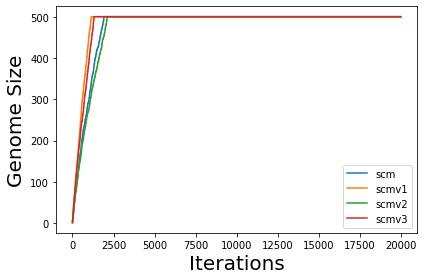

In [133]:
evaluation.plot_evolution({"scm":scm._genome_size_history, "scmv1":scmv1._genome_size_history, "scmv2":scmv2._genome_size_history, "scmv3":scmv3._genome_size_history},"Genome Size")


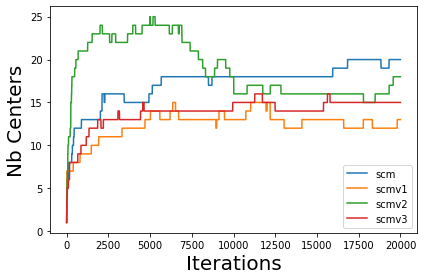

In [134]:
evaluation.plot_evolution({"scm":scm._nb_centers_history, "scmv1":scmv1._nb_centers_history, "scmv2":scmv2._nb_centers_history, "scmv3":scmv3._nb_centers_history},"Nb Centers")


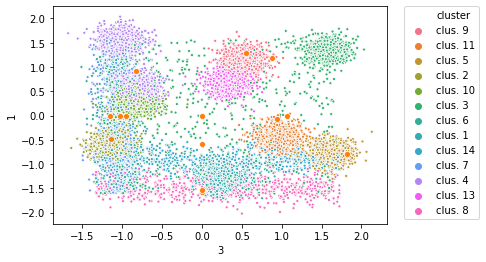

In [135]:
evaluation.plot_projection(scm.cluster_centers_,X,y_pred_scm,x=3,y=1)

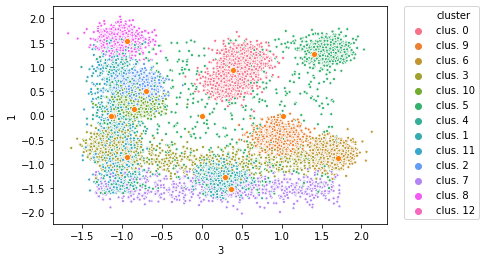

In [136]:
evaluation.plot_projection(scmv1.cluster_centers_,X,y_pred_scmv1,x=3,y=1)

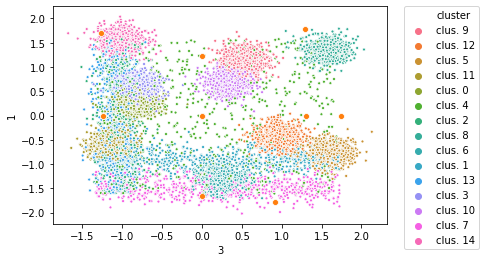

In [137]:
evaluation.plot_projection(scmv2.cluster_centers_,X,y_pred_scmv2,x=3,y=1)

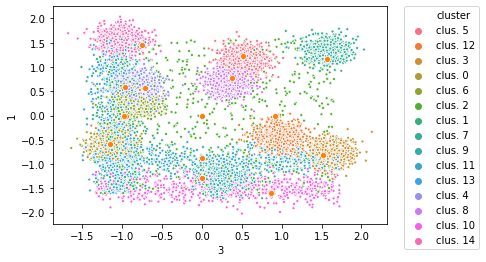

In [138]:
evaluation.plot_projection(scmv3.cluster_centers_,X,y_pred_scmv3,x=3,y=1)

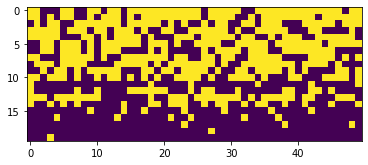

In [139]:
plt.imshow(scm.subspaces_>0)


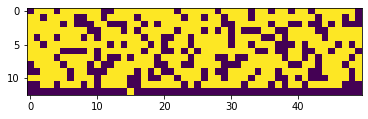

In [140]:
plt.imshow(scmv1.subspaces_>0)

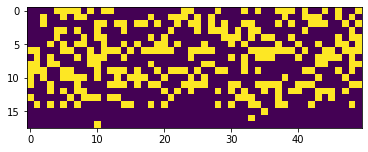

In [141]:
plt.imshow(scmv2.subspaces_>0)

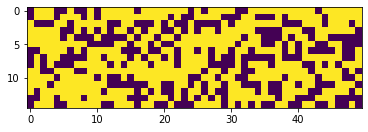

In [142]:
plt.imshow(scmv3.subspaces_>0)

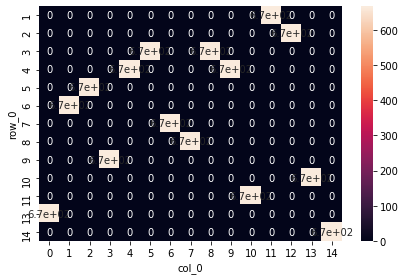

In [143]:
evaluation.plot_cross_tab(y_true,y_pred_scm)


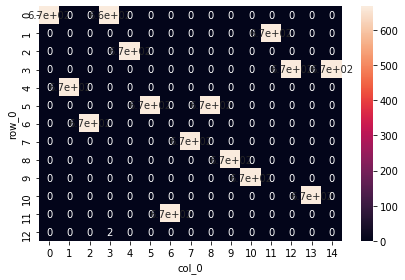

In [144]:
evaluation.plot_cross_tab(y_true,y_pred_scmv1)


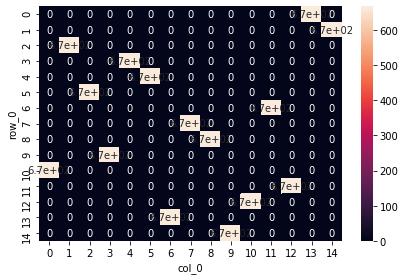

In [145]:
evaluation.plot_cross_tab(y_true,y_pred_scmv2)


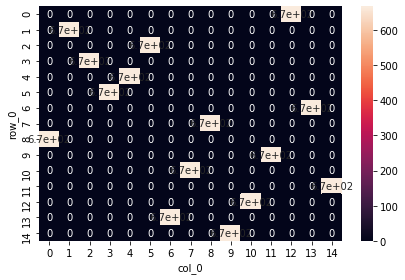

In [146]:
evaluation.plot_cross_tab(y_true,y_pred_scmv3)


In [147]:
evaluation.evaluate(y_true,y_pred_scm)

{'accuracy': 0.8666,
 'f1': 0.9111110983322154,
 'precision': 0.86666665466516,
 'recall': 0.9999999849999928,
 'entropy': 0.9317150725633323,
 'ce': 0.8665999991334}

In [148]:
evaluation.evaluate(y_true,y_pred_scmv1)

{'accuracy': 0.8002,
 'f1': 0.8887332799280456,
 'precision': 0.8333830398008358,
 'recall': 0.9996013837069182,
 'entropy': 0.8976732020863593,
 'ce': 0.8001999991998}

In [149]:
evaluation.evaluate(y_true,y_pred_scmv2)

{'accuracy': 1.0,
 'f1': 0.9999999849999928,
 'precision': 0.9999999849999928,
 'recall': 0.9999999849999928,
 'entropy': 1.000003687136227,
 'ce': 0.999999999}

In [150]:
evaluation.evaluate(y_true,y_pred_scmv3)

{'accuracy': 1.0,
 'f1': 0.9999999849999928,
 'precision': 0.9999999849999928,
 'recall': 0.9999999849999928,
 'entropy': 1.000003687136227,
 'ce': 0.999999999}

In [24]:
from sklearn.cluster import KMeans
km = KMeans(10)

In [25]:
y_pred_kmeans = km.fit_predict(X)

In [26]:
evaluation.evaluate(y_true,y_pred_kmeans)

{'accuracy': 0.9996,
 'f1': 0.9994003856391886,
 'precision': 0.9996015736333707,
 'recall': 0.9992031800159363,
 'entropy': 0.9988715289756425,
 'ce': 0.9995999980008}

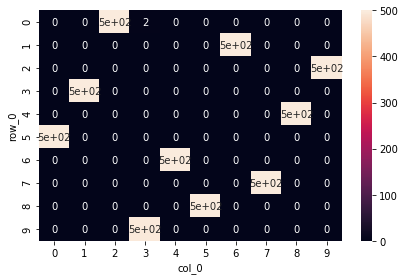

In [27]:
evaluation.plot_cross_tab(y_true,y_pred_kmeans)
